# 1. IMPORT THE LIBRARIES AND READ THE DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
inp0 = pd.read_csv('AB_NYC_2019.csv')
inp0.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19-10-2018   
1  Entire home/apt    225               1                 45  21-05-2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  05-07-2019   
4  Entire home/apt     80              10                  9  19-11-2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
inp0.shape

(48895, 16)

In [5]:
inp0.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
inp0.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
inp0.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

# 2. CREATING FEATURES

## 2.1 CATEGORISING 'AVAILABILTY 365' FEATURE INTO 5 CATEGORIES

In [9]:
def availability_365_categories_function(row):
    
    if row <= 1:
        return 'very Low'
    elif row <= 100:
        return 'Low'
    elif row <= 200 :
        return 'Medium'
    elif (row <= 300):
        return 'High'
    else:
        return 'very High'

In [10]:
inp0['availabilty_365_categories'] = inp0.availability_365.map(availability_365_categories_function)
inp0['availabilty_365_categories'].head(15)

0     very High
1     very High
2     very High
3        Medium
4      very Low
5        Medium
6      very Low
7          High
8      very Low
9        Medium
10          Low
11          Low
12    very High
13    very High
14     very Low
Name: availabilty_365_categories, dtype: object

In [11]:
inp0.availabilty_365_categories.value_counts()

very Low     17941
Low          11829
very High     8108
Medium        5792
High          5225
Name: availabilty_365_categories, dtype: int64

## 2.2 CATEGORISING 'MINIMUM NIGHTS' COLUM INTO 5 CATEGORIES

In [12]:
def minimum_night_categories_function(row):

    if row <= 1:
        return 'very Low'
    elif row <= 3:
        return 'Low'
    elif row <= 5 :
        return 'Medium'
    elif (row <= 7):
        return 'High'
    else:
        return 'very High'

In [13]:
inp0['minimum_nights_categories'] = inp0.minimum_nights.map(minimum_night_categories_function)
inp0['minimum_nights_categories'].head(15)

0      very Low
1      very Low
2           Low
3      very Low
4     very High
5           Low
6     very High
7           Low
8           Low
9      very Low
10       Medium
11          Low
12       Medium
13          Low
14    very High
Name: minimum_nights_categories, dtype: object

In [14]:
inp0.minimum_nights_categories.value_counts()

Low          19695
very Low     12720
very High     7333
Medium        6337
High          2810
Name: minimum_nights_categories, dtype: int64

## 2.3 categorizing  the "number_of_reviews" column into 5 categories

In [15]:
def number_of_reviews_categories_function(row):
    
    if row <= 1:
        return 'very Low'
    elif row <= 5:
        return 'Low'
    elif row <= 10 :
        return 'Medium'
    elif (row <= 30):
        return 'High'
    else:
        return 'very High'

In [16]:
inp0['number_of_reviews_categories'] = inp0.minimum_nights.map(number_of_reviews_categories_function)
inp0['number_of_reviews_categories'].head(10)

0     very Low
1     very Low
2          Low
3     very Low
4       Medium
5          Low
6    very High
7          Low
8          Low
9     very Low
Name: number_of_reviews_categories, dtype: object

In [17]:
inp0.number_of_reviews_categories.value_counts()

Low          26032
very Low     12720
High          5893
Medium        3503
very High      747
Name: number_of_reviews_categories, dtype: int64

## 2.4 categorising 'price' column into 5 category

In [18]:
inp0.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

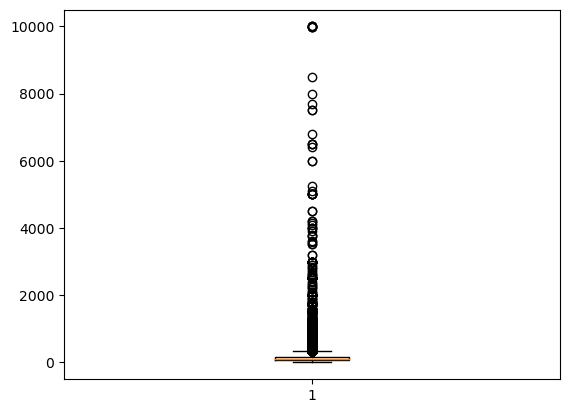

In [19]:
plt.boxplot(inp0.price)
plt.show()

In [20]:
inp0[inp0.price == 0].shape

(11, 19)

In [21]:
def price_categories_function(row):
    
    if row <= 1:
        return 'very Low'
    elif row <= 4:
        return 'Low'
    elif row <= 15 :
        return 'Medium'
    elif (row <= 100):
        return 'High'
    else:
        return 'very High'

In [22]:
inp0['price_categories'] = inp0.minimum_nights.map(price_categories_function)
inp0['price_categories'].head(10)

0    very Low
1    very Low
2         Low
3    very Low
4      Medium
5         Low
6        High
7         Low
8         Low
9    very Low
Name: price_categories, dtype: object

In [23]:
inp0.price_categories.value_counts()

Low          22998
very Low     12720
Medium        7556
High          5447
very High      174
Name: price_categories, dtype: int64

# 3. FIXING COLUMNS

In [24]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [25]:
inp0.last_review.dtype

dtype('O')

In [26]:
inp0.last_review = pd.to_datetime(inp0.last_review)
inp0.last_review

C:\Users\Devyani\AppData\Local\Temp\ipykernel_3016\875808853.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  inp0.last_review = pd.to_datetime(inp0.last_review)


0       2018-10-19
1       2019-05-21
2              NaT
3       2019-05-07
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [27]:
inp0.last_review.dtypes

dtype('<M8[ns]')

In [28]:
print([inp0.columns])

[Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availabilty_365_categories',
       'minimum_nights_categories', 'number_of_reviews_categories',
       'price_categories'],
      dtype='object')]


#  4. DATA TYPES

## 4.1 CATEGORICAL COLOMS

In [29]:
inp0.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availabilty_365_categories',
       'minimum_nights_categories', 'number_of_reviews_categories',
       'price_categories'],
      dtype='object')

In [30]:
categorical_columns = inp0.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'availabilty_365_categories',
 'minimum_nights_categories',
 'number_of_reviews_categories',
 'price_categories']

In [31]:
inp0[categorical_columns].head()

name    host_name  \
0                Clean & quiet apt home by the park         John   
1                             Skylit Midtown Castle     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park        Laura   

  neighbourhood_group neighbourhood        room_type  \
0            Brooklyn    Kensington     Private room   
1           Manhattan       Midtown  Entire home/apt   
2           Manhattan        Harlem     Private room   
3            Brooklyn  Clinton Hill  Entire home/apt   
4           Manhattan   East Harlem  Entire home/apt   

  availabilty_365_categories minimum_nights_categories  \
0                  very High                  very Low   
1                  very High                  very Low   
2                  very High                       Low   
3                     Medium                  very Low   
4                   very Low                 very High   

  number_of_reviews_categories price_categories  
0                     very Low         very Low  
1                     very Low         very Low  
2                          Low              Low  
3                     very Low         very Low  
4                       Medium           Medium

## 4.2 NUMERICAL COLOMS

In [32]:
numerical_columns = inp0.select_dtypes(include=['int64']).columns.tolist()
numerical_columns

['id',
 'host_id',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

In [33]:
inp0[numerical_columns].head()

id  host_id  price  minimum_nights  number_of_reviews  \
0  2539     2787    149               1                  9   
1  2595     2845    225               1                 45   
2  3647     4632    150               3                  0   
3  3831     4869     89               1                270   
4  5022     7192     80              10                  9   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [34]:
inp0[numerical_columns].describe()

id       host_id         price  minimum_nights  \
count  4.889500e+04  4.889500e+04  48895.000000    48895.000000   
mean   1.901714e+07  6.762001e+07    152.720687        7.029962   
std    1.098311e+07  7.861097e+07    240.154170       20.510550   
min    2.539000e+03  2.438000e+03      0.000000        1.000000   
25%    9.471945e+06  7.822033e+06     69.000000        1.000000   
50%    1.967728e+07  3.079382e+07    106.000000        3.000000   
75%    2.915218e+07  1.074344e+08    175.000000        5.000000   
max    3.648724e+07  2.743213e+08  10000.000000     1250.000000   

       number_of_reviews  calculated_host_listings_count  availability_365  
count       48895.000000                    48895.000000      48895.000000  
mean           23.274466                        7.143982        112.781327  
std            44.550582                       32.952519        131.622289  
min             0.000000                        1.000000          0.000000  
25%             1.000000                        1.000000          0.000000  
50%             5.000000                        1.000000         45.000000  
75%            24.000000                        2.000000        227.000000  
max           629.000000                      327.000000        365.000000

# 5. MISSING VALUES

In [37]:
inp0.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
availabilty_365_categories            0
minimum_nights_categories             0
number_of_reviews_categories          0
price_categories                      0
dtype: int64

In [38]:
round(100*inp0.isnull().sum()/len(inp0),2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
availabilty_365_categories         0.00
minimum_nights_categories          0.00
number_of_reviews_categories       0.00
price_categories                   0.00
dtype: float64

## 5.1 MISSING VALUE ANALYSIS

In [39]:
inp1 = inp0.loc[inp0.last_review.isnull(),:]
inp1

id                                               name   host_id  \
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
19         7750                  Huge 2 BR Upper East  Cental Park     17985   
26         8700  Magnifique Suite au N de Manhattan - vue Cloitres     26394   
36        11452                        Clean and Quiet in Brooklyn      7355   
38        11943                          Country space in the city     45445   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

             host_name neighbourhood_group       neighbourhood  latitude  \
2            Elisabeth           Manhattan              Harlem  40.80902   
19                Sing           Manhattan         East Harlem  40.79685   
26     Claude & Sophie           Manhattan              Inwood  40.86754   
36                  Vt            Brooklyn  Bedford-Stuyvesant  40.68876   
38             Harriet            Brooklyn            Flatbush  40.63702   
...                ...                 ...                 ...       ...   
48890          Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891          Marisol            Brooklyn            Bushwick  40.70184   
48892    Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893              Taz           Manhattan      Hell's Kitchen  40.75751   
48894       Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
2      -73.94190     Private room    150               3                  0   
19     -73.94872  Entire home/apt    190               7                  0   
26     -73.92639     Private room     80               4                  0   
36     -73.94312     Private room     35              60                  0   
38     -73.96327     Private room    150               1                  0   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
2             NaT                NaN                               1   
19            NaT                NaN                               2   
26            NaT                NaN                               1   
36            NaT                NaN                               1   
38            NaT                NaN                               1   
...           ...                ...                             ...   
48890         NaT                NaN                               2   
48891         NaT                NaN                               2   
48892         NaT                NaN                               1   
48893         NaT                NaN                               6   
48894         NaT                NaN                               1   

       availability_365 availabilty_365_categories minimum_nights_categories  \
2                   365                  very High                       Low   
19                  249                       High                      High   
26                    0                   very Low                    Medium   
36   

In [40]:
inp1.shape

(10052, 20)

#### 5.2 MISSING VALUE ANALYSIS (NEIGHBOURHOOD GROUP FEATURE)

In [41]:
inp0.neighbourhood_group.value_counts(ascending=False)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

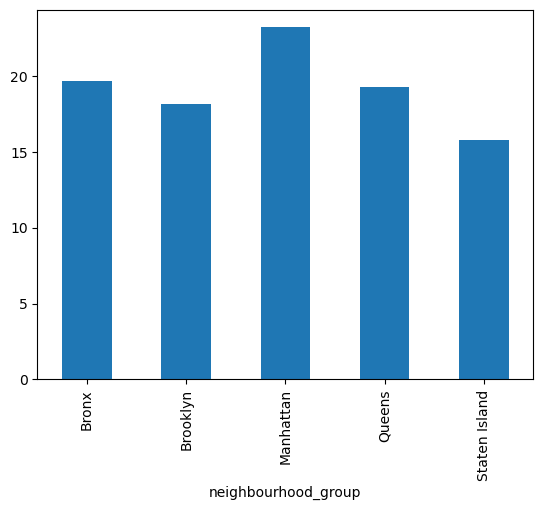

In [42]:
((inp1.groupby('neighbourhood_group').neighbourhood_group.count()/inp0.groupby('neighbourhood_group').neighbourhood_group.count())*100).plot.bar()
plt.show()

In [43]:
((inp1.groupby('neighbourhood_group').neighbourhood_group.count()/inp0.groupby('neighbourhood_group').neighbourhood_group.count())*100).mean()

19.240898461107257

#### - Each neighbourhood_group has about 19 % missing values in 'last_review' feature.

## 5.3 MISSING VALUE ANALYSIS (ROOM TYPE FEATURE) 

In [44]:
# Count of 'room_type' with missing values
inp3 = (inp1.groupby('room_type').room_type.count()/inp0.groupby('room_type').room_type.count())*100
inp3

room_type
Entire home/apt    19.981109
Private room       20.877004
Shared room        27.068966
Name: room_type, dtype: float64

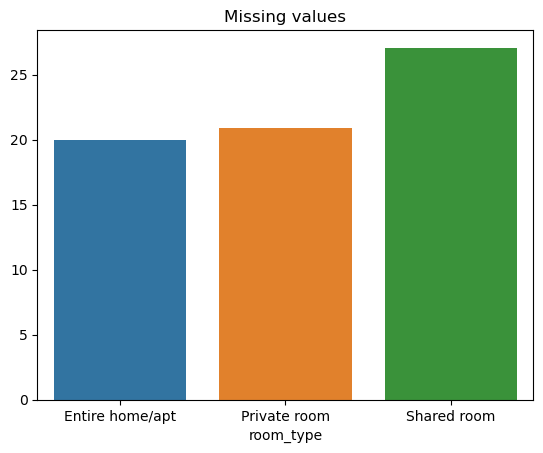

In [45]:
plt.title('Missing values')
sns.barplot(x = inp3.index, y = inp3.values)
plt.show()

#### 'Shared room' has the highest missing value percentage (27 %) for 'last_review' feature while to other room types has only about 20 %.

In [46]:
print('Mean and Median of prices with last_review feature missing')
print('Mean   = ', inp0[inp0['last_review'].isnull()].price.mean())
print('Median = ', inp0[inp0['last_review'].isnull()].price.median())

print('\nMean and Median of prices with last_review feature not missing')
print('Mean   = ', inp0[inp0['last_review'].notnull()].price.mean())
print('Median = ', inp0[inp0['last_review'].notnull()].price.median())

Mean and Median of prices with last_review feature missing
Mean   =  192.9190210903303
Median =  120.0

Mean and Median of prices with last_review feature not missing
Mean   =  142.317946605566
Median =  101.0


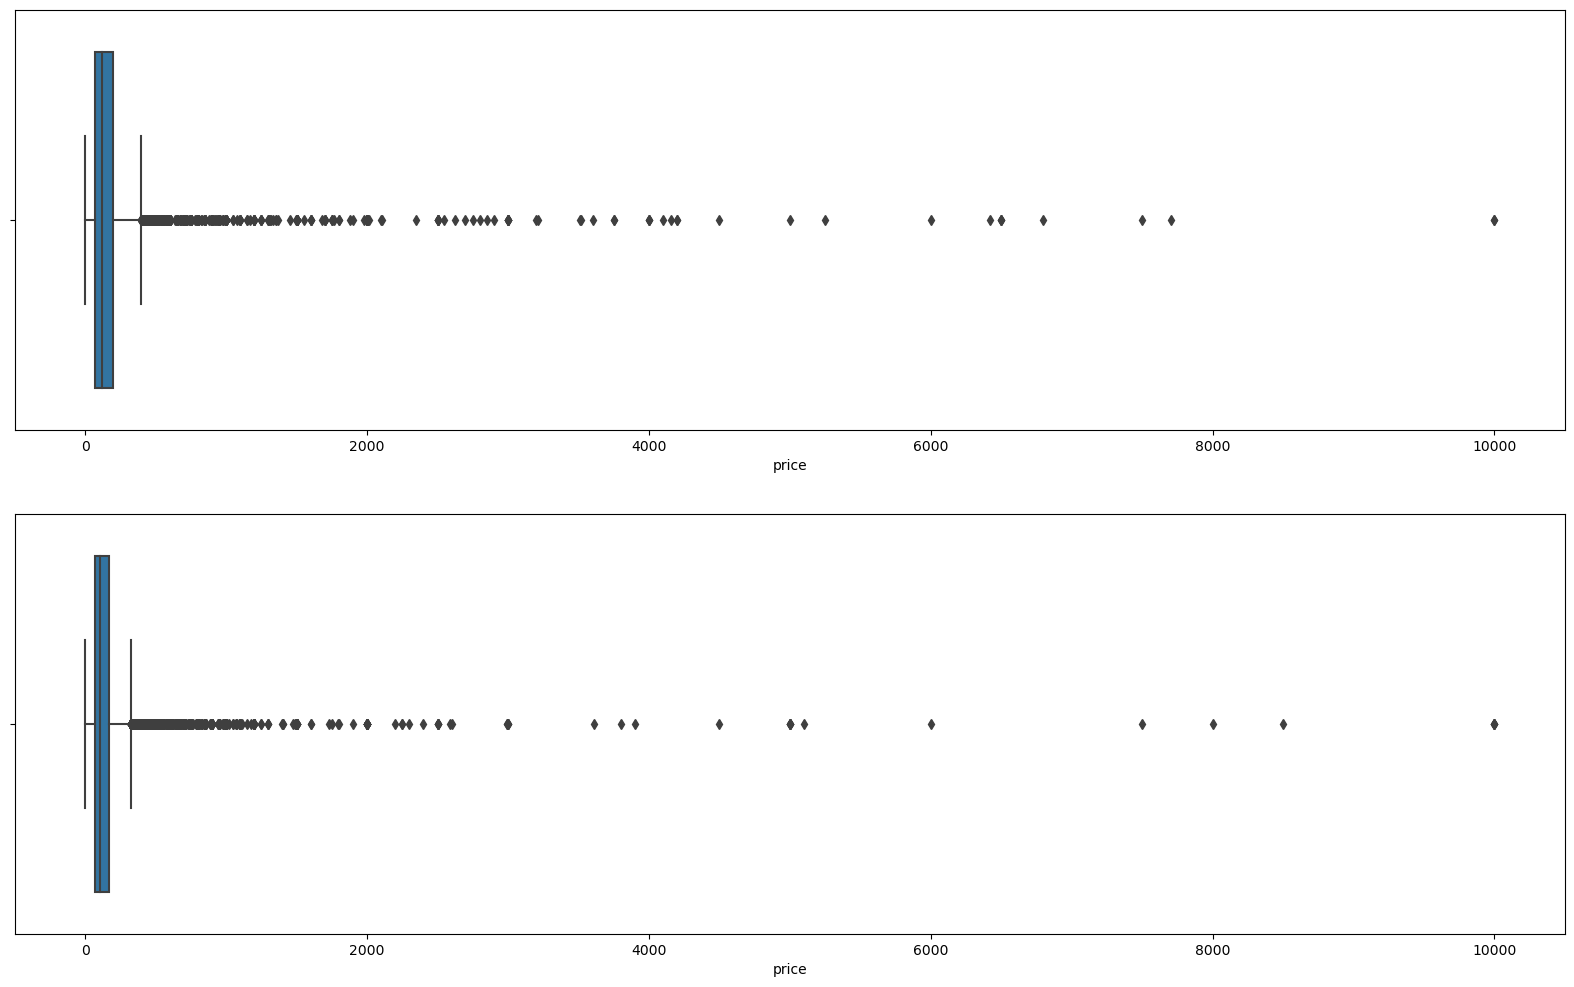

In [47]:
plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
sns.boxplot(data = inp0[inp0['last_review'].isnull()] , x = 'price',  width= .8)

plt.subplot(2,1,2)
sns.boxplot(data = inp0[inp0['last_review'].notnull()] , x = 'price',  width= .8)

plt.show()

#### - The pricing is higher when 'last_review' feature is missing . 
#### - reviews are less likely to be given for shared rooms
#### - When the prices are high reviews are less likely to be given
#### - The above analysis seems to show that the missing values here are not MCAR (missing completely at random)


# 6. UNIVARIATE ANALYSIS

In [48]:
inp0.head(30)

id                                               name  host_id  \
0   2539                 Clean & quiet apt home by the park     2787   
1   2595                              Skylit Midtown Castle     2845   
2   3647                THE VILLAGE OF HARLEM....NEW YORK !     4632   
3   3831                    Cozy Entire Floor of Brownstone     4869   
4   5022   Entire Apt: Spacious Studio/Loft by central park     7192   
5   5099          Large Cozy 1 BR Apartment In Midtown East     7322   
6   5121                                    BlissArtsSpace!     7356   
7   5178                   Large Furnished Room Near B'way      8967   
8   5203                 Cozy Clean Guest Room - Family Apt     7490   
9   5238                 Cute & Cozy Lower East Side 1 bdrm     7549   
10  5295                   Beautiful 1br on Upper West Side     7702   
11  5441                    Central Manhattan/near Broadway     7989   
12  5803     Lovely Room 1, Garden, Best Area, Legal rental     9744   
13  6021   Wonderful Guest Bedroom in Manhattan for SINGLES    11528   
14  6090                      West Village Nest - Superhost    11975   
15  6848                   Only 2 stops to Manhattan studio    15991   
16  7097                  Perfect for Your Parents + Garden    17571   
17  7322                                    Chelsea Perfect    18946   
18  7726    Hip Historic Brownstone Apartment with Backyard    20950   
19  7750                  Huge 2 BR Upper East  Cental Park    17985   
20  7801                   Sweet and Spacious Brooklyn Loft    21207   
21  8024                     CBG CtyBGd HelpsHaiti rm#1:1-4    22486   
22  8025                           CBG Helps Haiti Room#2.5    22486   
23  8110                              CBG Helps Haiti Rm #2    22486   
24  8490             MAISON DES SIRENES1,bohemian apartment    25183   
25  8505                 Sunny Bedroom Across Prospect Park    25326   
26  8700  Magnifique Suite au N de Manhattan - vue Cloitres    26394   
27  9357                               Midtown Pied-a-terre    30193   
28  9518       SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM    31374   
29  9657                   Modern 1 BR / NYC / EAST VILLAGE    21904   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
5              Chris           Manhattan         Murray Hill  40.74767   
6              Garon            Brooklyn  Bedford-Stuyvesant  40.68688   
7           Shunichi           Manhattan      Hell's Kitchen  40.76489   
8          MaryEllen           Manhattan     Upper West Side  40.80178   
9                Ben           Manhattan           Chinatown  40.71344   
10              Lena           Manhattan     Upper West Side  40.80316   
11              Kate           Manhattan      Hell's Kitchen  40.76076   
12            Laurie            Brooklyn         South Slope  40.66829   
13           Claudio           Manhattan     Upper West Side  40.79826   
14             Alina           Manhattan        West Village  40.73530   
15     Allen & Irina            Brooklyn        Williamsburg  40.70837   
16              Jane            Brooklyn         Fort Greene  40.69169   
17              Doti           Manhattan             Chelsea  40.74192   
18  Adam And Charity            Brooklyn       Crown Heights  40.67592   
19              Sing           Manhattan         East Harlem  40.79685   
20             Chaya            Brooklyn        Williamsburg  40.71842   
21             Lisel            Brooklyn          Park Slope  40.68069   
22             Lisel            Brooklyn          Park Slope  40.67989 

## 6.1 NAME

In [49]:
inp0.name.isnull().sum()

16

In [50]:
inp0.name.value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47896, dtype: int64

## 6.2 HOST ID 

In [51]:
inp0.host_id.isnull().sum()

0

In [52]:
inp0.host_id.value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

## 6.3 HOST NAME

In [53]:
inp0.host_name.isnull().sum()

21

In [54]:
inp0.host_name.value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [55]:
inp0.host_name.value_counts().index[:10]

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground',
       'Sarah', 'Daniel', 'Jessica', 'Maria'],
      dtype='object')

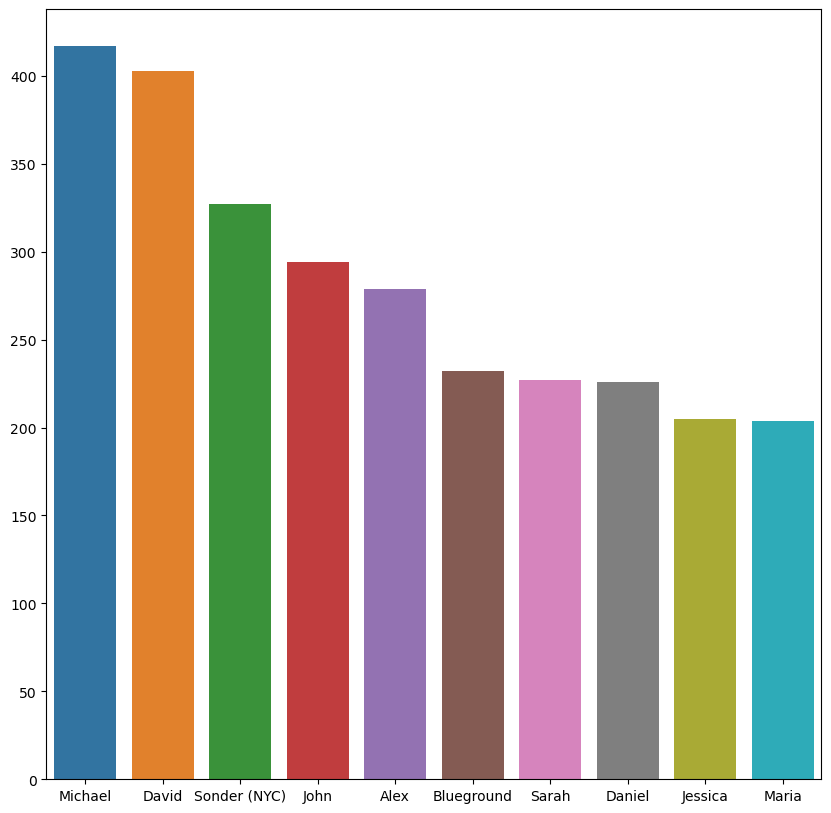

In [56]:
# Top 10 host's
plt.figure(figsize=(10,10))
sns.barplot(x = inp0.host_name.value_counts().index[:10] , y = inp0.host_name.value_counts().values[:10])
plt.show()

## 6.4 NEIGHBOIRHOOD GROUP

In [57]:
inp0.neighbourhood_group.isnull().sum()

0

In [58]:
inp0.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [59]:
inp0.neighbourhood_group.value_counts(normalize=True)*100

Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64

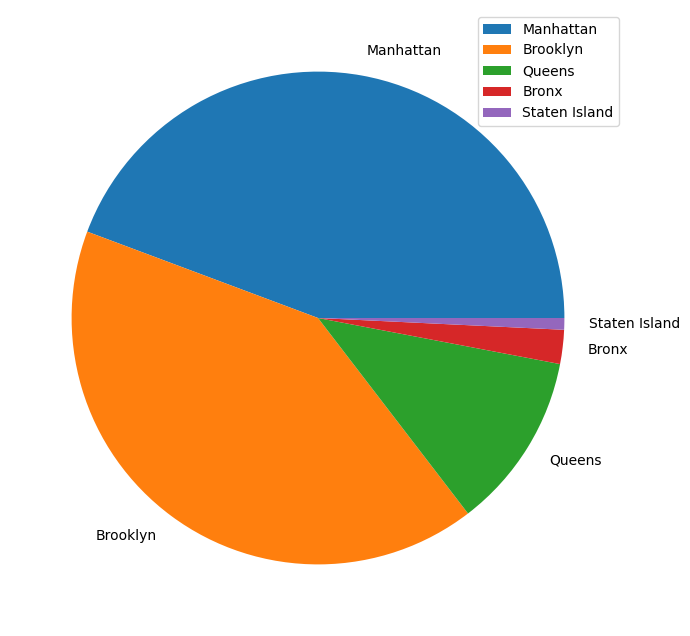

In [60]:
plt.figure(figsize=(8,8))
plt.pie(x = inp0.neighbourhood_group.value_counts(normalize= True) * 100,labels = inp0.neighbourhood_group.value_counts(normalize= True).index)
plt.legend()
plt.show()

85 % of the listing are Manhattan and Brooklyn neighbourhood_group

## 6.5 NEIGHBOURHOOD

In [61]:
inp0.neighbourhood.isnull().sum()

0

In [62]:
inp0.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

## 6.6 ROOM TYPE

In [63]:
inp0.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [64]:
inp0.room_type.value_counts(normalize=True)*100

Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: room_type, dtype: float64

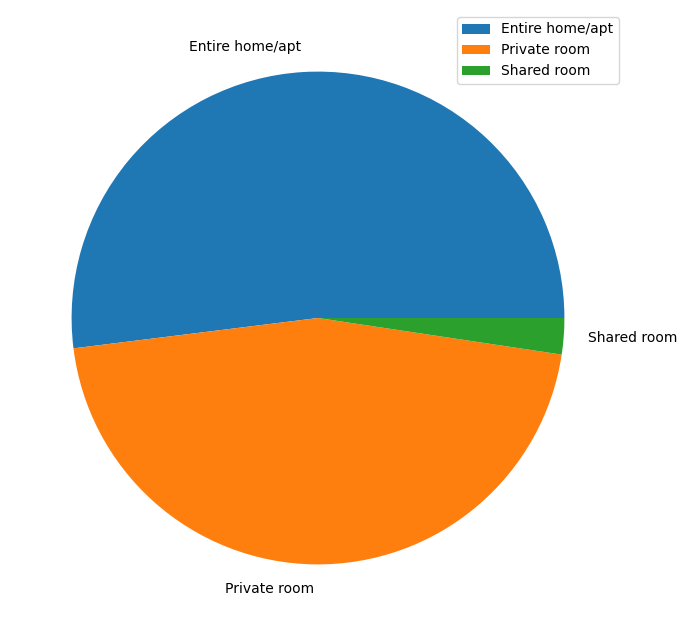

In [65]:
plt.figure(figsize=(8,8))
plt.pie(x = inp0.room_type.value_counts(normalize= True) * 100,labels = inp0.room_type.value_counts(normalize= True).index,counterclock=True)
plt.legend()
plt.show()

## 6.7 Price

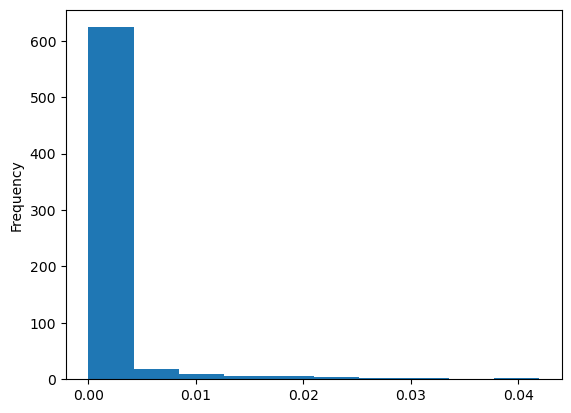

In [66]:
inp0.price.value_counts(normalize=True).plot.hist()
plt.show()

C:\Users\Devyani\AppData\Local\Temp\ipykernel_3016\4203382358.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp0.price,kde=True)


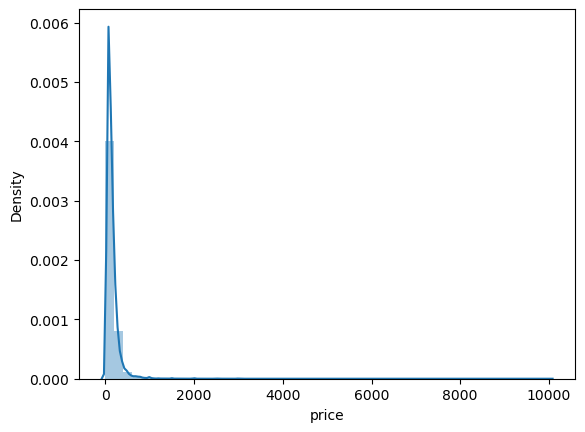

In [67]:
sns.distplot(inp0.price,kde=True)
plt.show()

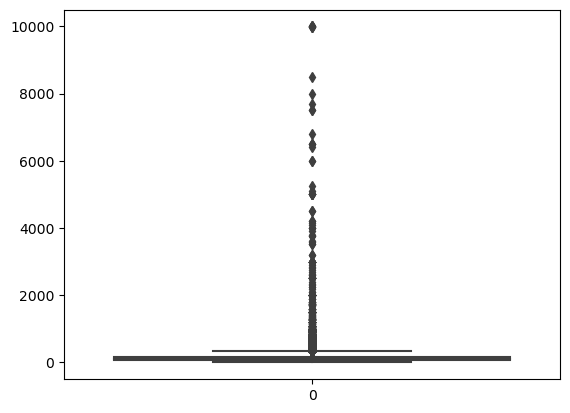

In [68]:
sns.boxplot(inp0.price)
plt.show()

## 6.8 MINIMUM NIGHTS

In [69]:
inp0.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [70]:
inp0.minimum_nights.isnull().sum()

0

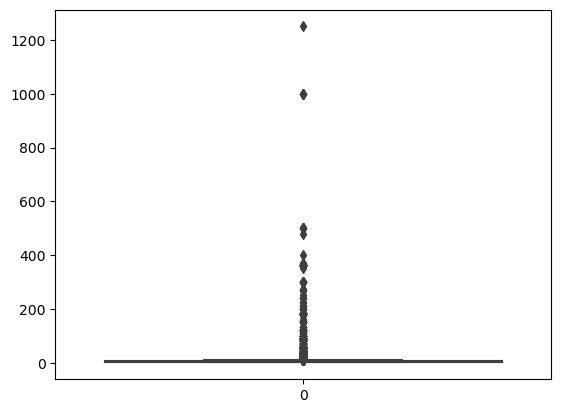

In [71]:
sns.boxplot(inp0.minimum_nights)
plt.show()

## 6.9 NUMBER OF REVIEWS

In [72]:
inp0.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

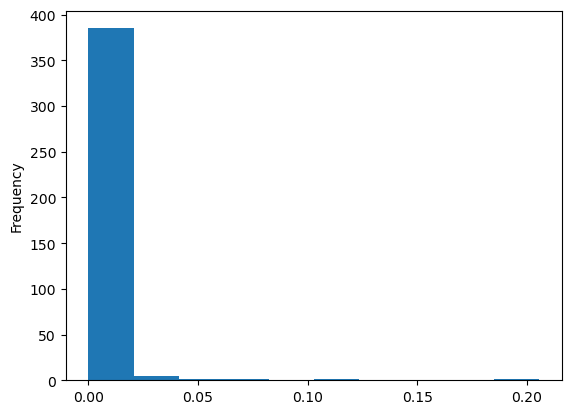

In [73]:
inp0.number_of_reviews.value_counts(normalize=True).plot.hist()
plt.show()

C:\Users\Devyani\AppData\Local\Temp\ipykernel_3016\4258575927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp0.number_of_reviews)


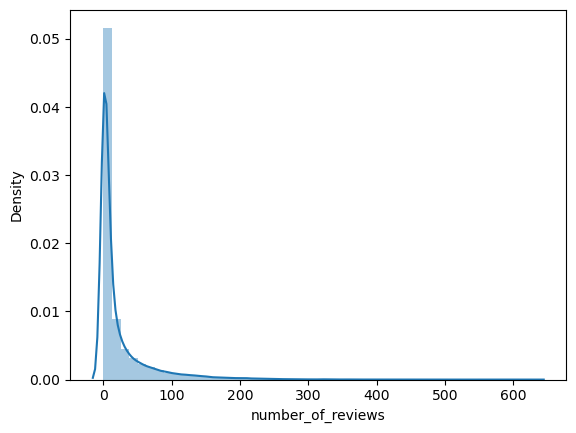

In [74]:
sns.distplot(inp0.number_of_reviews)
plt.show()

## 6.10 reviews per month

In [75]:
inp0.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

<Axes: ylabel='Frequency'>

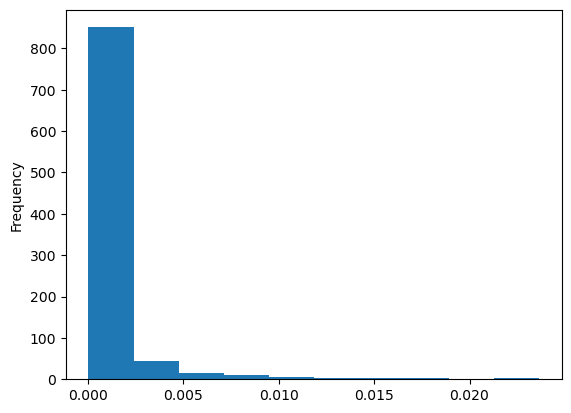

In [76]:
inp0.reviews_per_month.value_counts(normalize=True).plot.hist()

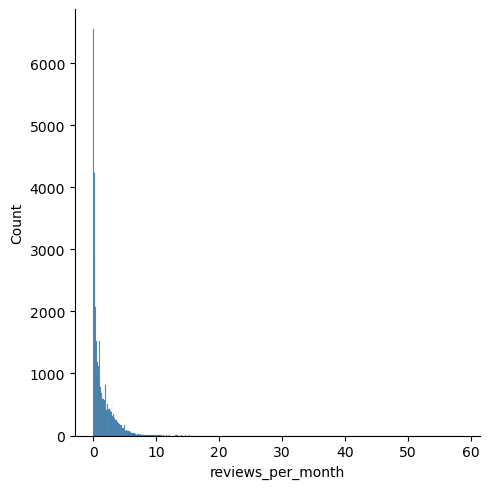

In [77]:
sns.displot(inp0.reviews_per_month)
plt.show()

## 6.11 AVAILABILITY 365

In [78]:
inp0.availability_365.describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

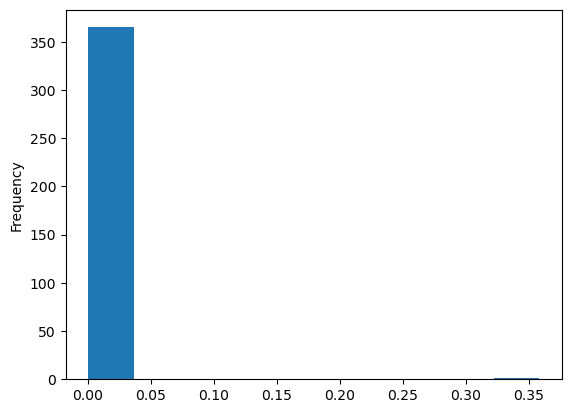

In [79]:
inp0.availability_365.value_counts(normalize=True).plot.hist()
plt.show()

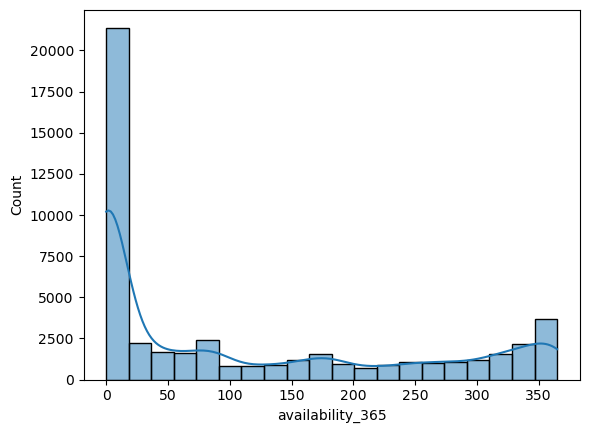

In [80]:
sns.histplot(inp0.availability_365,bins = 20,kde = True)
plt.show()

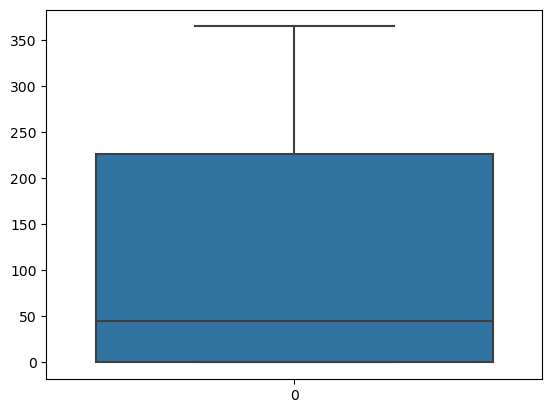

In [81]:
sns.boxplot(inp0.availability_365)
plt.show()

## 6.13 MINIMUM NIGHT CATEGORIES 

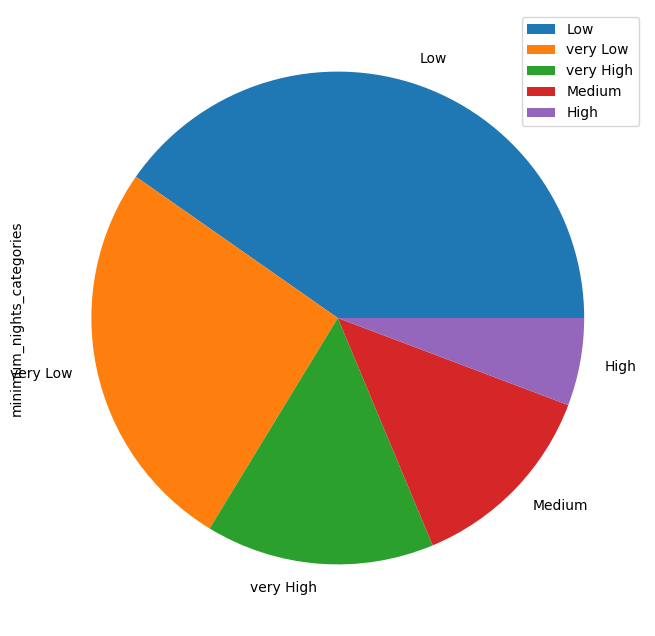

In [82]:
plt.figure(figsize=(8,8))
inp0.minimum_nights_categories.value_counts(normalize=True).plot.pie()
plt.legend()
plt.show()

## 6.14 PRICE CATEGORY

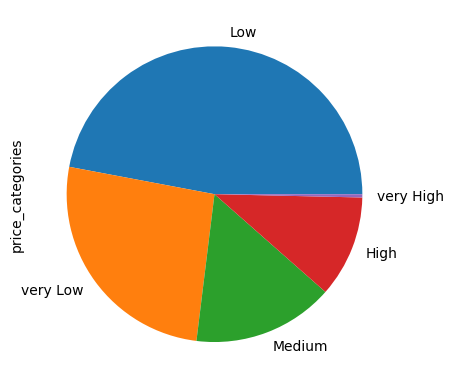

In [83]:
inp0.price_categories.value_counts(normalize=True).plot.pie()
plt.show()

# 7. BIVARIATE AND MULTIVARIATE ANALYSIS

In [84]:
inp0[numerical_columns].head()

id  host_id  price  minimum_nights  number_of_reviews  \
0  2539     2787    149               1                  9   
1  2595     2845    225               1                 45   
2  3647     4632    150               3                  0   
3  3831     4869     89               1                270   
4  5022     7192     80              10                  9   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

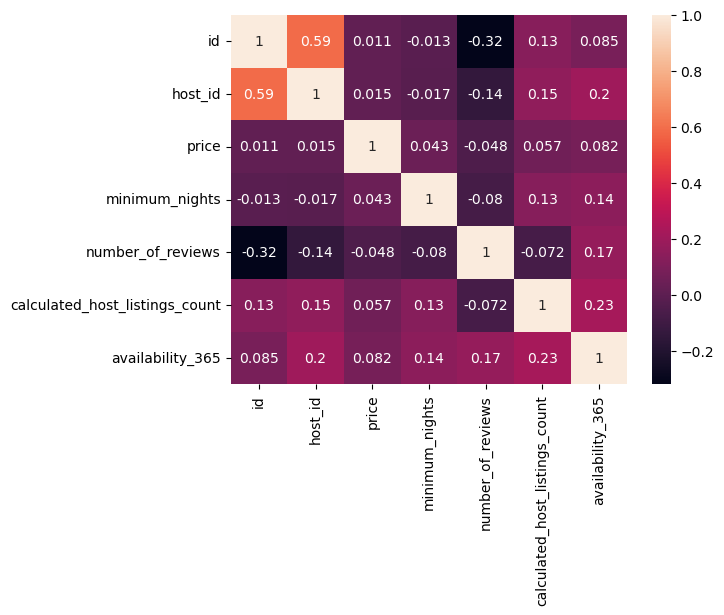

In [85]:
res = inp0[numerical_columns].corr()
sns.heatmap(res, annot=True)
plt.show()

In [86]:
corr_matrix = inp0[numerical_columns].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

In [87]:
corr_matrix

id   host_id     price  minimum_nights  \
id                              1.000000  0.588290  0.010619        0.013224   
host_id                         0.588290  1.000000  0.015309        0.017364   
price                           0.010619  0.015309  1.000000        0.042799   
minimum_nights                  0.013224  0.017364  0.042799        1.000000   
number_of_reviews               0.319760  0.140106  0.047954        0.080116   
calculated_host_listings_count  0.133272  0.154950  0.057472        0.127960   
availability_365                0.085468  0.203492  0.081829        0.144303   

                                number_of_reviews  \
id                                       0.319760   
host_id                                  0.140106   
price                                    0.047954   
minimum_nights                           0.080116   
number_of_reviews                        1.000000   
calculated_host_listings_count           0.072376   
availability_365                         0.172028   

                                calculated_host_listings_count  \
id                                                    0.133272   
host_id                                               0.154950   
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                     0.072376   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   

                                availability_365  
id                                      0.085468  
host_id                                 0.203492  
price                                   0.081829  
minimum_nights                          0.144303  
number_of_reviews                       0.172028  
calculated_host_listings_count          0.225701  
availability_365                        1.000000

In [88]:
sol

id                              host_id                           0.588290
                                number_of_reviews                 0.319760
calculated_host_listings_count  availability_365                  0.225701
host_id                         availability_365                  0.203492
number_of_reviews               availability_365                  0.172028
host_id                         calculated_host_listings_count    0.154950
minimum_nights                  availability_365                  0.144303
host_id                         number_of_reviews                 0.140106
id                              calculated_host_listings_count    0.133272
minimum_nights                  calculated_host_listings_count    0.127960
id                              availability_365                  0.085468
price                           availability_365                  0.081829
minimum_nights                  number_of_reviews                 0.080116
number_of_reviews        

### ROOM TYPE AND NO OF REVIEW CATEGORY

In [89]:
pd.crosstab(inp0['room_type'], inp0['number_of_reviews_categories'])

number_of_reviews_categories  High    Low  Medium  very High  very Low
room_type                                                             
Entire home/apt               3809  14909    1960        504      4227
Private room                  1950  10769    1494        226      7887
Shared room                    134    354      49         17       606

In [90]:
inp0.groupby('room_type').number_of_reviews.sum() 

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [91]:
inp0.groupby('room_type').number_of_reviews.sum()/inp0.room_type.value_counts()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
dtype: float64

#### The various kinds of properties that exist w.r.t. customer preferences.?
#### Entire home/apt have more reviews than Shared rooms
#### 'Shared room' are less likey to give reviews. only 16 %

### 'availability_365_categories', 'price_categories' and 'reviews_per_month'

In [92]:
inp0.price_categories.value_counts(normalize=True)*100

Low          47.035484
very Low     26.014930
Medium       15.453523
High         11.140198
very High     0.355865
Name: price_categories, dtype: float64

In [93]:
pd.DataFrame(inp0.groupby(['availabilty_365_categories','price_categories']).reviews_per_month.mean())

reviews_per_month
availabilty_365_categories price_categories                   
High                       High                       0.598431
                           Low                        2.200373
                           Medium                     1.056111
                           very High                  0.342308
                           very Low                   3.289381
Low                        High                       0.638307
                           Low                        1.783956
                           Medium                     0.883844
                           very High                  0.803750
                           very Low                   2.896114
Medium                     High                       0.591070
                           Low                        1.993565
                           Medium                     1.157492
                           very High                  0.517500
                           very Low                   2.893918
very High                  High                       0.428464
                           Low                        1.490562
                           Medium                     0.694283
                           very High                  0.276571
                           very Low                   2.206077
very Low                   High                       0.337780
                           Low                        0.506051
                           Medium                     0.276970
                           very High                  0.480588
                           very Low                   0.673759

##### If the combination of availability and price is very high, reviews_per_month will be low on average.
#### Very high availability and very low price are likely to get more reviews.